### 모델 저장과 복원

In [2]:
from tensorflow import keras
(train_input,train_target) , (test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
test_scaled = test_input/255.0

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='sigmoid'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist = model.fit(train_scaled,train_target,epochs=30,validation_split=(0.2))

Epoch 1/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7425 - accuracy: 0.7435 - val_loss: 0.4783 - val_accuracy: 0.8294
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5147 - accuracy: 0.8180 - val_loss: 0.4278 - val_accuracy: 0.8418
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4686 - accuracy: 0.8331 - val_loss: 0.4115 - val_accuracy: 0.8501
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4476 - accuracy: 0.8422 - val_loss: 0.3870 - val_accuracy: 0.8562
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4270 - accuracy: 0.8476 - val_loss: 0.3816 - val_accuracy: 0.8602
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4168 - accuracy: 0.8503 - val_loss: 0.3675 - val_accuracy: 0.8620
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4043 - accuracy: 0.8548 - val_loss: 0.3575 - val_accuracy:

In [8]:
model.save_weights('model-weights.h5') # 모델의 파라미터 저장

In [9]:
model.save('model-whole.h5') # 모델의 파라미터와 모델구조 저장

In [10]:
!ls -al #리스트 보기

total 1304
drwxr-xr-x 1 root root   4096 May 18 00:27 .
drwxr-xr-x 1 root root   4096 May 18 00:08 ..
drwxr-xr-x 4 root root   4096 May 16 13:23 .config
-rw-r--r-- 1 root root 333272 May 18 00:27 model-weights.h5
-rw-r--r-- 1 root root 982568 May 18 00:27 model-whole.h5
drwxr-xr-x 1 root root   4096 May 16 13:24 sample_data


In [12]:
model2 = keras.models.load_model('/content/model-whole.h5') #저장한 모델 불러오기
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(model2.weights)

In [14]:
model2.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.3449 - accuracy: 0.8780


[0.3448830842971802, 0.878000020980835]

### 콜백

In [22]:
def add(a,b):
  print(f'add:{a},{b}')
  return a+b

In [23]:
def sub(a,b):
  print(f'add:{a},{b}')
  return a-b

In [24]:
def doall(ls1,ls2,fn):
  s = []
  for i in range(len(ls1)):
    s.append(fn(ls1[i],ls2[i]))
  return s

In [25]:
re = doall([1,2,3],[4,5,6],add)
print(re)

add:1,4
add:2,5
add:3,6
[5, 7, 9]


In [26]:
re = doall([1,2,3],[4,5,6],sub)
print(re)

add:1,4
add:2,5
add:3,6
[-3, -3, -3]


In [28]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='sigmoid'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [30]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True) #가장좋은거 하나만 저장

hist = model.fit(train_scaled,train_target,epochs=30,validation_split=0.2,callbacks=[checkpoint_cb])

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7380 - accuracy: 0.7464 - val_loss: 0.4798 - val_accuracy: 0.8243
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5142 - accuracy: 0.8193 - val_loss: 0.4274 - val_accuracy: 0.8426
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4665 - accuracy: 0.8343 - val_loss: 0.4019 - val_accuracy: 0.8508
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4452 - accuracy: 0.8417 - val_loss: 0.3830 - val_accuracy: 0.8592
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4246 - accuracy: 0.8483 - val_loss: 0.3737 - val_accuracy: 0.8632
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4132 - accuracy: 0.8525 - val_loss: 0.3652 - val_accuracy: 0.8664
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4004 - accuracy: 0.8574 - val_loss: 0.3609 - val_accuracy:

In [31]:
model3 = keras.models.load_model('/content/best-model.h5') #저장한 모델 불러오기
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [32]:
model3.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.8775


[0.3429686427116394, 0.8774999976158142]

In [ ]:
# early stop
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='sigmoid'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.summary()

In [34]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True) #가장좋은거 하나만 저장
early_stoping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True) #손실이 5개정도 굿핏을 못내면 stop
hist = model.fit(train_scaled,train_target,epochs=1500,validation_split=0.2,callbacks=[checkpoint_cb,early_stoping_cb])

Epoch 1/1500
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7445 - accuracy: 0.7418 - val_loss: 0.4794 - val_accuracy: 0.8284
Epoch 2/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5144 - accuracy: 0.8173 - val_loss: 0.4196 - val_accuracy: 0.8450
Epoch 3/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4679 - accuracy: 0.8332 - val_loss: 0.4012 - val_accuracy: 0.8498
Epoch 4/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4442 - accuracy: 0.8410 - val_loss: 0.3893 - val_accuracy: 0.8565
Epoch 5/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4248 - accuracy: 0.8487 - val_loss: 0.3764 - val_accuracy: 0.8625
Epoch 6/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4139 - accuracy: 0.8512 - val_loss: 0.3669 - val_accuracy: 0.8649
Epoch 7/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4019 - accuracy: 0.8556 - val_loss: 0.3597 -

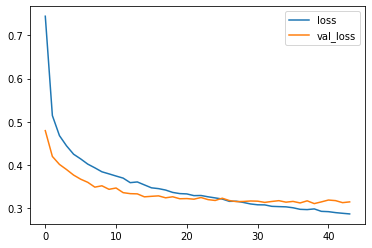

In [35]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

# CNN

## 합성곱 신경망의 구성요소

In [36]:
#원본 x 필터(커널) -> pooling -> flatten 
#원본 x 필터(커널) = 특성맵
#pooling : 축소하는 역할

In [39]:
from tensorflow import keras
keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',padding = 'same',strides=2)# padding_default = 없음,명시해줘야 생김

In [40]:
keras.layers.MaxPool2D(2) # pooing 사이즈 설정

##합성곱 신경망을 사용한 이미지 분류

In [41]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [51]:
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
train_rinput = train_input.reshape(-1,28,28,1)
test_rinput = test_input.reshape(-1,28,28,1)
train_scaled = train_rinput/255.0 # min-max 변환
test_scaled = test_rinput/255.0 # min-max 변환

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2)

In [52]:
model = keras.Sequential() 
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))

model.add(keras.layers.Conv2D(16,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPool2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))

model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)              

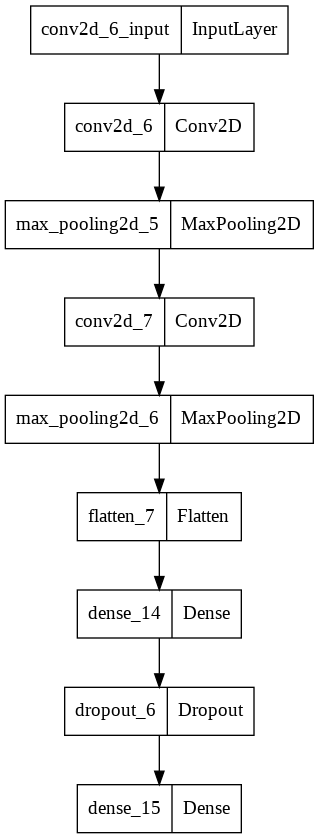

In [53]:
keras.utils.plot_model(model)

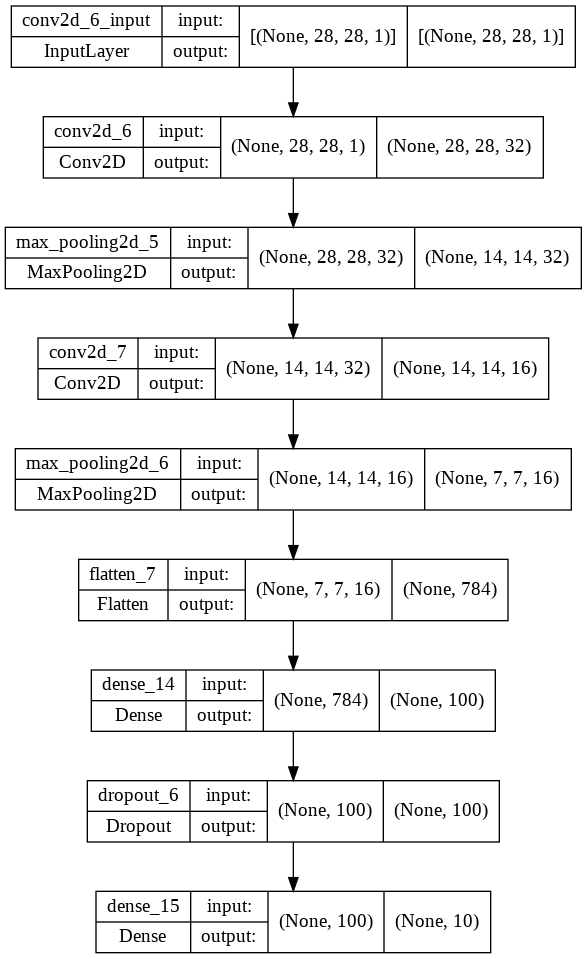

In [54]:
keras.utils.plot_model(model,show_shapes=True)

In [55]:
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

history = model.fit(train_scaled,train_target,validation_split=0.2,epochs=30000,callbacks=[early_stopping_cb])

Epoch 1/30000
1200/1200 [==============================] - 35s 29ms/step - loss: 0.6790 - accuracy: 0.7532 - val_loss: 0.3818 - val_accuracy: 0.8619
Epoch 2/30000
1200/1200 [==============================] - 37s 31ms/step - loss: 0.4498 - accuracy: 0.8415 - val_loss: 0.3324 - val_accuracy: 0.8770
Epoch 3/30000
1200/1200 [==============================] - 35s 29ms/step - loss: 0.3963 - accuracy: 0.8595 - val_loss: 0.3031 - val_accuracy: 0.8876
Epoch 4/30000
1200/1200 [==============================] - 35s 29ms/step - loss: 0.3614 - accuracy: 0.8702 - val_loss: 0.2809 - val_accuracy: 0.8960
Epoch 5/30000
1200/1200 [==============================] - 34s 29ms/step - loss: 0.3303 - accuracy: 0.8797 - val_loss: 0.2646 - val_accuracy: 0.9013
Epoch 6/30000
1200/1200 [==============================] - 34s 29ms/step - loss: 0.3113 - accuracy: 0.8859 - val_loss: 0.2618 - val_accuracy: 0.9050
Epoch 7/30000
1200/1200 [==============================] - 35s 29ms/step - loss: 0.2965 - accuracy: 0.8922

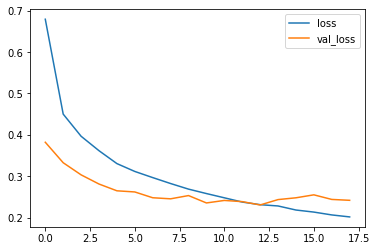

In [57]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

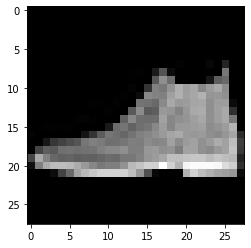

9


In [59]:
plt.imshow(test_scaled[0].reshape(28,28),cmap='gray')
plt.show()
print(test_target[0])

In [60]:
model.predict(test_scaled[0:1])

array([[3.2665594e-13, 1.1294097e-13, 8.9829965e-14, 7.6241520e-13,
        6.4519653e-12, 7.0086310e-07, 2.1840252e-11, 2.0806061e-05,
        2.3286992e-11, 9.9997854e-01]], dtype=float32)

In [61]:
preds = model.predict(test_scaled[0:1])
print(preds)

[[3.2665594e-13 1.1294097e-13 8.9829965e-14 7.6241520e-13 6.4519653e-12
  7.0086310e-07 2.1840252e-11 2.0806061e-05 2.3286992e-11 9.9997854e-01]]


## 합성곱 신경망의 시각화

In [62]:
model.save('best-cnn-model.h5')

In [63]:
model.layers

In [65]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [66]:
print(conv.weights)

[<tf.Variable 'conv2d_6/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.21467133, -0.17071006, -0.22706515,  0.05351241,
          -0.24238709, -0.1943226 ,  0.193432  , -0.24214834,
          -0.0621267 , -0.0794774 , -0.06605633, -0.17977208,
          -0.0656864 , -0.07454316,  0.29386437,  0.310832  ,
          -0.05333896,  0.08918325,  0.24562821, -0.138409  ,
          -0.31018037, -1.3531839 , -0.8070018 , -0.350037  ,
          -0.17746128,  0.00166119, -0.23563601,  0.17346905,
          -0.2609706 , -0.14668497, -0.18391271, -0.02232522]],

        [[-0.03536412,  0.04019965, -0.12486785, -0.03892323,
           0.2579628 ,  0.172884  ,  0.04068971, -0.28731963,
           0.15851748,  0.19302534,  0.17384677, -0.00729361,
          -0.04868826, -1.140728  ,  0.27253085,  0.1741122 ,
          -0.01781498,  0.23960802, -0.02137088, -0.22792059,
          -0.14265285, -1.5998323 , -0.16128086,  0.1590992 ,
           0.30707848,  0.01699712,  0.11453266,  0.1

In [68]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.04036568 0.30590093


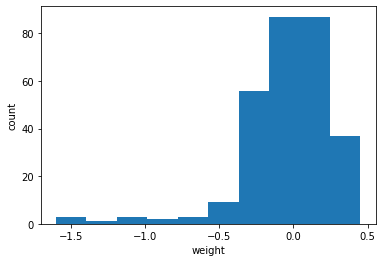

In [70]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

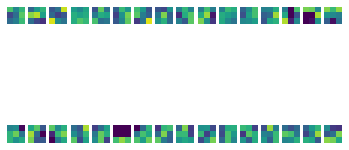

In [73]:
#학습후 커널의 plot
ig,axs = plt.subplots(2,16)
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
#학습전 커널의 plot
model2 = keras.Sequential() 
model2.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model2.add(keras.layers.MaxPool2D(2))

model2.add(keras.layers.Conv2D(16,kernel_size=3,activation='relu',padding='same'))
model2.add(keras.layers.MaxPool2D(2))

model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(100,activation='relu'))

model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(10,activation='softmax'))
model2.summary()

In [75]:
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')

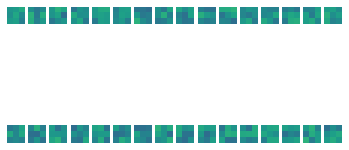

In [79]:
conv2 = model2.layers[0]
conv_weights2 = conv2.weights[0].numpy()
fig,axs = plt.subplots(2,16)
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights2[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [80]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.coef_ = np.random.uniform(0,1)
print(lr.coef_)

0.7129075204755914


### 특성 맵맵 시각화

In [81]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_6_input'), name='conv2d_6_input', description="created by layer 'conv2d_6_input'")


In [82]:
print(model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 32), dtype=tf.float32, name=None), name='conv2d_6/Relu:0', description="created by layer 'conv2d_6'")


In [83]:
conv_acti = keras.Model(model.input,model.layers[0].output)
print(conv_acti)

In [87]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
inputs.shape

(1, 28, 28, 1)

In [88]:
train_scaled[0:1].shape

(1, 28, 28, 1)

In [89]:
feature_maps = conv_acti.predict(inputs)

In [90]:
print(feature_maps.shape)

(1, 28, 28, 32)


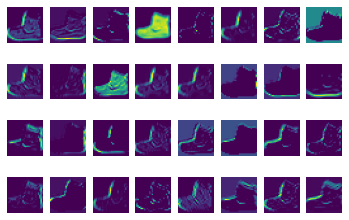

In [91]:
fig,axs = plt.subplots(4,8)
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

# 보너스 강의 - OpenCV맛

In [92]:
import cv2
from google.colab.patches import cv2_imshow

In [94]:
image = np.zeros((100,180,3),np.uint8)

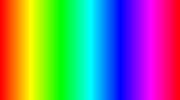

In [95]:
#색조(H)
for i in range(0,180):
  image[:,i,0]=i
image[:,:,1]=255
image[:,:,2]=255
img = cv2.cvtColor(image,cv2.COLOR_HSV2BGR)
cv2_imshow(img)

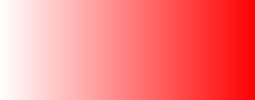

In [96]:
#채도(s)
image = np.zeros((100,255,3),np.uint8)
image[:,i,0]=0
for i in range(0,255):
  image[:,i,1]=i
image[:,:,2]=255
img = cv2.cvtColor(image,cv2.COLOR_HSV2BGR)
cv2_imshow(img)

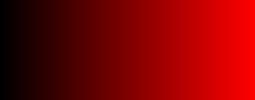

In [97]:
#명도(v)
image = np.zeros((100,255,3),np.uint8)
image[:,i,0]=0
for i in range(0,255):
  image[:,i,2]=i
image[:,:,1]=255
img = cv2.cvtColor(image,cv2.COLOR_HSV2BGR)
cv2_imshow(img)

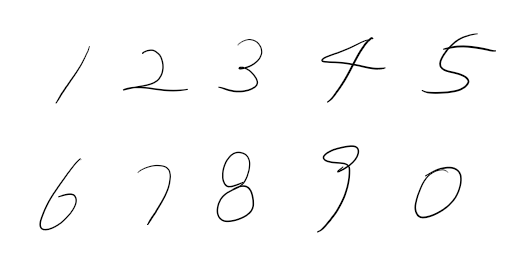

In [118]:
path = '/content/Number.png'
src_image = cv2.imread(path,cv2.IMREAD_COLOR)
cv2_imshow(src_image)

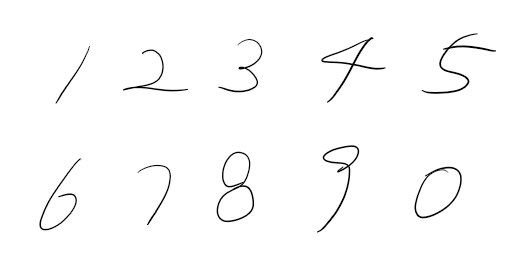

In [119]:
cpy_image = src_image.copy()
gray_image = cv2.cvtColor(src_image,cv2.COLOR_BGR2GRAY) # 흑백 조절
cv2_imshow(gray_image)

In [122]:
src_image.shape, gray_image.shape

((259, 532, 3), (259, 532))

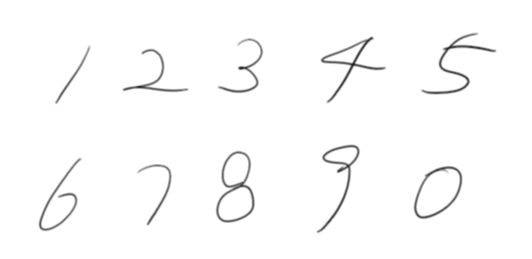

In [123]:
blur_image = cv2.GaussianBlur(gray_image,(3,3),0) # (3,3)흐릿한 크기정도
cv2_imshow(blur_image)

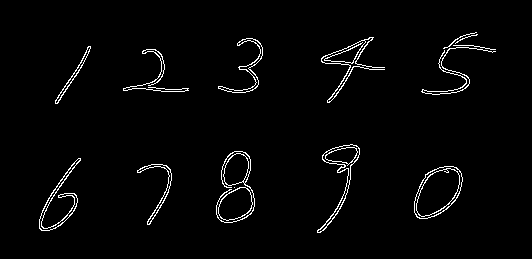

In [124]:
canny_image = cv2.Canny(blur_image,100,200) #테두리 잡기전 작업
cv2_imshow(canny_image)

In [125]:
contours, _ = cv2.findContours(canny_image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

store_xywh=[]
for contour in contours : 
  x,y,w,h = cv2.boundingRect(contour)
  flag = False
  if w>30 and h>=40:
    for sv in store_xywh:
      gx = abs(sv[0]-x)
      gy = abs(sv[1]-y)
      if gx<5 and gy<5:
        flag = True
        break
  else : 
    flag = True
  if flag == False : 
    store_xywh.append([x,y,w,h])

for sv in store_xywh:
  print(sv)

[414, 166, 49, 53]
[137, 164, 35, 61]
[39, 158, 42, 73]
[216, 151, 39, 72]
[317, 144, 43, 89]
[123, 49, 66, 43]
[421, 47, 75, 48]
[55, 46, 36, 58]
[218, 38, 45, 55]
[321, 37, 64, 66]


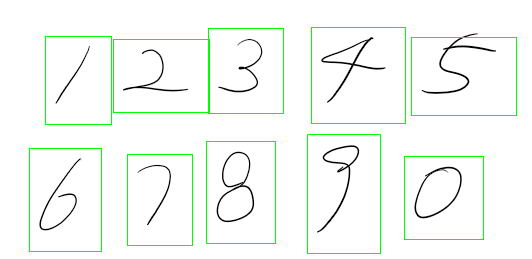

In [126]:
for sv in store_xywh:
  x,y,w,h=sv
  cv2.rectangle(src_image,(x-10,y-10),(x+w+20,y+h+20),(0,255,0),1)
cv2_imshow(src_image)

#손글씨

In [127]:
(image_train,label_train),(image_test,label_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [128]:
print(image_train.shape)

(60000, 28, 28)


In [130]:
np.unique(label_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [135]:
from sklearn import svm

In [132]:
image_train2 = image_train.reshape(-1,28*28)
image_test2 = image_test.reshape(-1,28*28)

In [136]:
svm= svm.SVC() #svm의 분류 모델생성
svm.fit(image_train2,label_train)

SVC()

In [137]:
pval = svm.predict(image_test2)

In [138]:
from sklearn import metrics
score = metrics.accuracy_score(pval, label_test)
print(score)

0.9792


In [140]:
from keras.utils import np_utils 
label_train2 = np_utils.to_categorical(label_train)
label_test2 = np_utils.to_categorical(label_test)
print(label_train[0])
print(label_train2[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [141]:
scaled_train = image_train/255.0
scaled_test = image_test/255.0

In [152]:
from keras import layers,models
model = models.Sequential()
model.add(layers.Dense(100,activation='relu', input_shape = (784,)))
#model.add(layers.Dense(28,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
history = model.fit(image_train2,label_train2,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3793 - accuracy: 0.8605
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5739 - accuracy: 0.9225
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4777 - accuracy: 0.9384
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4393 - accuracy: 0.9463
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4076 - accuracy: 0.9508
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3895 - accuracy: 0.9532
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3714 - accuracy: 0.9577
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3546 - accuracy: 0.9610
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3328 - accuracy: 0.9631
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step - l

In [153]:
score = model.evaluate(image_test2,label_test2)
print(score)

313/313 [==============================] - 1s 2ms/step - loss: 2.4150 - accuracy: 0.9648
[2.415038585662842, 0.9648000001907349]
